In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.4, random_state=21)
model = LogisticRegression()
model.fit(X_train, y_train)
# make prediction (None, n_classes)
y_pred_proba = model.predict_proba(X_test)

/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0

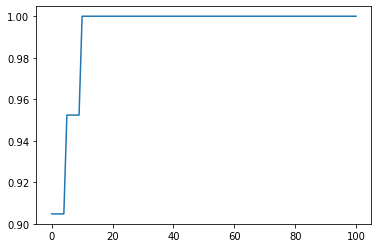

In [2]:
import numpy as np
from wisecoop import Cooperante

# prepare penalty array
penalty_array = np.array([[0, 1, 1],
                          [1, 0, 1],
                          [1, 1, 0]])
# Instantiation
coop = Cooperante(penalty_array)
# Fitting
pred, penalty_min = coop.fit(y_pred_proba)
# Visualization
fig, ax = coop.plot_eval(y_test, metrics='recall_score', class_ref = 1, sampling_rate = 0.01)

# Percentage of human cooperatoin to achieve your KPI (e.g. recall score >= 0.99)
coop.score_to_check_rate(class_ref = 1, metric="recall_score", threshold = 0.99)
coop.check_rate_to_score(class_ref = 1, metric="recall_score", threshold = 0.5)

In [ ]:
# Instantiation
coop = Cooperante(penalty_array, class_to_check=1)
# Fitting
pred, penalty_min = coop.fit(y_pred_proba)
# Visualization
fig, ax = coop.plot_eval(y_test, metrics='recall_score', show_oracle=True,class_ref = [0,1,2],sampling_rate=0.01)
# Percentage of human cooperatoin to achieve your KPI (e.g. recall score >= 0.99)
coop.check_threshold([0.95, 0.99])

In [ ]:
import numpy as np
# prepare penalty array
penalty_array_1 = np.array([[0, 1, 1],
                          [50, 0, 1],
                          [1, 1, 0]])
# Instantiation
coop_1 = Cooperante(penalty_array_1)
# Fitting
pred, penalty_min = coop_1.fit(y_pred_proba)
# Visualization
fig, ax = coop_1.plot_eval(y_test, metrics='recall_score', class_ref = 0, sampling_rate=0.01)

coop_1.check_threshold([0.95, 0.99])

In [ ]:
import numpy as np

from wisecoop import Cooperante
import matplotlib.pyplot as plt

In [ ]:
prob = np.load("test.npy")
label = np.load("answer.npy")

In [ ]:
penalty_array = np.array([[0,1],[1, 0]])
coop = Cooperante(penalty_array, class_to_check=[1])

# coop_pred:(None,)
# expected_rink:(None,)
coop_pred, expected_risk = coop.fit(prob)

In [ ]:
# Visualize
fig, ax = coop.plot_eval(label, metrics=['recall_score',"precision_score"], class_ref = [1,0])
ax.set_xlabel('x value')
ax.set_ylabel('y value')
ax.legend(loc="lower right")
ax.grid()
ax.set_ylim(0.9,1.01)
coop.check_threshold()

In [ ]:
plt.hist(y_pred_proba[:, 2], cumulative=True, bins=20)